<a href="https://colab.research.google.com/github/aiswarya-joseph-08/Project-of-ML/blob/main/Extended_Employee_Performance_and_Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Employee retention and productivity are major challenges for modern organizations. High employee turnover leads to increased recruitment costs, loss of experienced talent, reduced productivity, and disruption in business operations. Traditional HR analysis methods rely on manual evaluation and often fail to identify employees who are at risk of leaving the organization at an early stage.

This project aims to develop a machine learning-based HR analytics model that analyzes employee performance, productivity, workload, satisfaction, and organizational factors to predict whether an employee is likely to resign. By identifying key factors such as salary, overtime, job satisfaction, training hours, promotions, and workload, the system helps HR departments take proactive steps to improve employee retention, enhance productivity, and support strategic workforce planning.

                                                                        
#                    
| Column Name                 | Description                                       |
| --------------------------- | ------------------------------------------------- |
| Employee_ID                 | Unique identification number for each employee    |
| Department                  | Department where the employee works               |
| Gender                      | Gender of the employee                            |
| Age                         | Age of the employee                               |
| Job_Title                   | Employee job designation                          |
| Hire_Date                   | Date when the employee joined the company         |
| Years_At_Company            | Total years employee worked in the company        |
| Education_Level             | Highest education qualification of employee       |
| Performance_Score           | Employee performance rating score                 |
| Monthly_Salary              | Monthly salary of the employee                    |
| Work_Hours_Per_Week         | Average working hours per week                    |
| Projects_Handled            | Number of projects handled by employee            |
| Overtime_Hours              | Extra working hours beyond regular schedule       |
| Sick_Days                   | Number of sick leave days taken                   |
| Remote_Work_Frequency       | How often employee works remotely                 |
| Team_Size                   | Number of team members working with employee      |
| Training_Hours              | Number of training hours completed                |
| Promotions                  | Number of promotions received                     |
| Employee_Satisfaction_Score | Employee job satisfaction rating                  |
| **Resigned**                | ✅ Whether employee left company (1 = Yes, 0 = No) |



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Extended_Employee_Performance_and_Productivity_Data.csv")
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [ ]:
df.isnull().sum()

,0
Employee_ID,0
Department,0
Gender,0
Age,0
Job_Title,0
Hire_Date,0
Years_At_Company,0
Education_Level,0
Performance_Score,0
Monthly_Salary,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df['Job_Title'].unique())

['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']


In [ ]:
print(df['Education_Level'].unique())

['High School' 'Bachelor' 'Master' 'PhD']


In [ ]:
df["Education_Level"].replace(['High School','Bachelor','Master','PhD'],[1,2,3,4],inplace=True)

/tmp/ipython-input-1467050421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education_Level"].replace(['High School','Bachelor','Master','PhD'],[1,2,3,4],inplace=True)
/tmp/ipython-input-1467050421.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Education_Level"].replace(['High Sch

<Axes: >

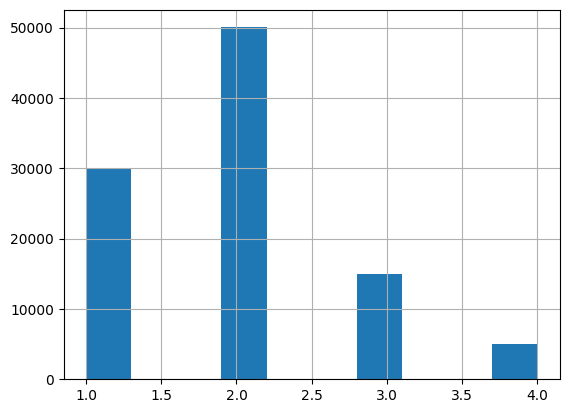

In [ ]:

df['Education_Level'].hist()

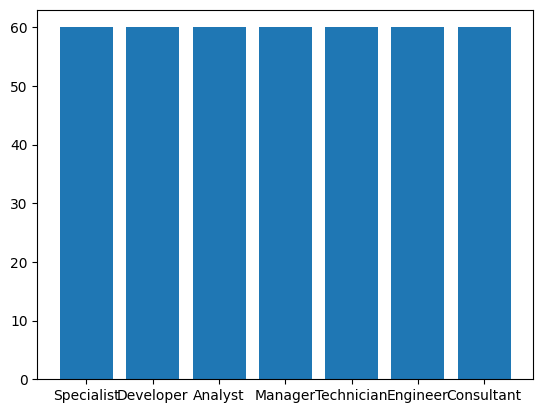

In [ ]:
plt.bar(df["Job_Title"],df['Age'])
plt.show()

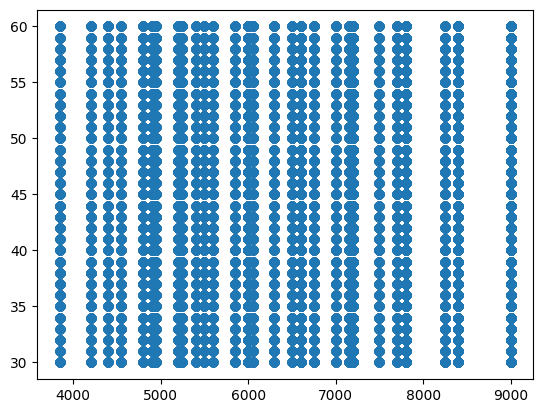

In [ ]:
plt.scatter(df['Monthly_Salary'],df['Work_Hours_Per_Week'])
plt.show()

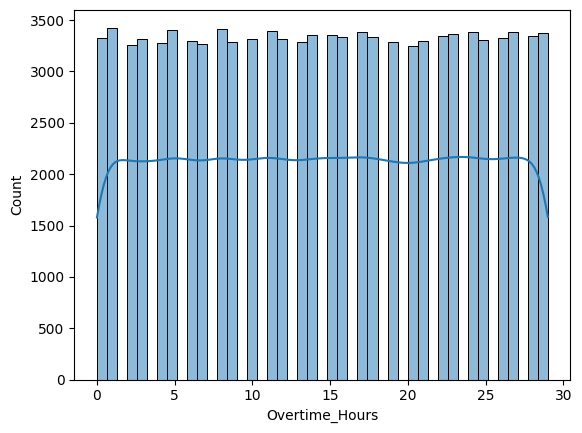

In [ ]:
sns.histplot(df["Overtime_Hours"],kde=True)
plt.show()

<Axes: >

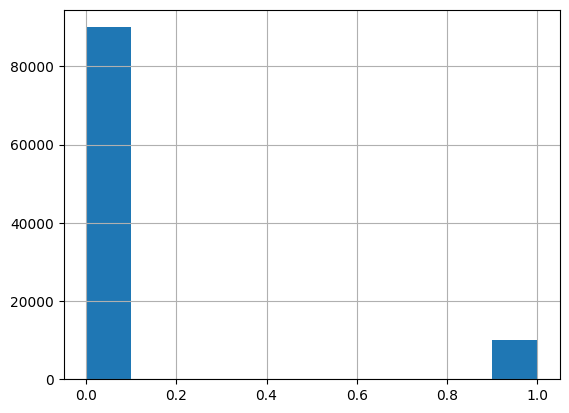

In [ ]:
df['Resigned'].astype(int).hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  int64  
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Job_Title'] = le.fit_transform(df['Job_Title'])
df['Resigned'] = le.fit_transform(df['Resigned'])

In [ ]:
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,4,1,55,5,2022-01-19 08:03:05.556036,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,0
1,2,2,1,29,2,2024-04-18 08:03:05.556036,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,0
2,3,2,1,55,5,2015-10-26 08:03:05.556036,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,4,0,0,48,0,2016-10-22 08:03:05.556036,7,2,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,5,1,0,36,0,2021-07-23 08:03:05.556036,3,2,2,4800.0,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2,1,27,6,2022-12-07 08:03:05.556036,1,2,4,4900.0,55,46,5,3,75,16,48,2,1.28,0
99996,99997,4,0,36,1,2018-07-24 08:03:05.556036,6,3,5,8250.0,39,35,7,0,0,10,77,1,3.48,1
99997,99998,7,1,53,0,2015-11-24 08:03:05.556036,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60,0
99998,99999,3,0,22,1,2015-08-03 08:03:05.556036,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10,0


In [ ]:
import pandas as pd

# Convert Hire_Date to datetime first
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

# Create date-only column
df['hire_date_only'] = df['Hire_Date'].dt.date


In [ ]:
df.drop(['Hire_Date'],axis=1,inplace=True)

In [ ]:
df

,Employee_ID,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,hire_date_only
0,1,4,1,55,5,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,0,2022-01-19
1,2,2,1,29,2,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,0,2024-04-18
2,3,2,1,55,5,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,0,2015-10-26
3,4,0,0,48,0,7,2,2,4800.0,52,10,28,12,100,10,0,1,1.86,0,2016-10-22
4,5,1,0,36,0,3,2,2,4800.0,38,11,29,13,100,15,9,1,1.25,0,2021-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2,1,27,6,1,2,4,4900.0,55,46,5,3,75,16,48,2,1.28,0,2022-12-07
99996,99997,4,0,36,1,6,3,5,8250.0,39,35,7,0,0,10,77,1,3.48,1,2018-07-24
99997,99998,7,1,53,0,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60,0,2015-11-24
99998,99999,3,0,22,1,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10,0,2015-08-03


In [ ]:
df['hire_date_only'] = pd.to_datetime(df['hire_date_only'])
df['Month'] = df['hire_date_only'].dt.month
df['DayOfWeek'] = df['hire_date_only'].dt.dayofweek
df['year'] = df['hire_date_only'].dt.year
df.drop(columns=['hire_date_only'], inplace=True)

In [ ]:
x =df.drop(['Resigned'], axis=1)
y=df['Resigned']

In [ ]:
x

,Employee_ID,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,...,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Month,DayOfWeek,year
0,1,4,1,55,5,2,1,5,6750.0,33,...,22,2,0,14,66,0,2.63,1,2,2022
1,2,2,1,29,2,0,1,5,7500.0,34,...,13,14,100,12,61,2,1.72,4,3,2024
2,3,2,1,55,5,8,1,3,5850.0,37,...,6,3,50,10,1,0,3.17,10,0,2015
3,4,0,0,48,0,7,2,2,4800.0,52,...,28,12,100,10,0,1,1.86,10,5,2016
4,5,1,0,36,0,3,2,2,4800.0,38,...,29,13,100,15,9,1,1.25,7,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2,1,27,6,1,2,4,4900.0,55,...,5,3,75,16,48,2,1.28,12,2,2022
99996,99997,4,0,36,1,6,3,5,8250.0,39,...,7,0,0,10,77,1,3.48,7,1,2018
99997,99998,7,1,53,0,8,1,2,4800.0,31,...,6,5,0,5,87,1,2.60,11,1,2015
99998,99999,3,0,22,1,9,1,5,8250.0,35,...,10,1,75,2,31,1,3.10,8,0,2015


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_smote, y_train_smote = smote.fit_resample(x,y)

In [ ]:
import pandas as pd

train_df = pd.concat(
    [
        pd.DataFrame(x_train_smote, columns=x.columns),
        pd.Series(y_train_smote, name='Resigned')
    ],
    axis=1
)

In [ ]:
train_df.head()
train_df.shape
train_df['Resigned'].value_counts()

,count
Resigned,
0,89990
1,89990


<Axes: >

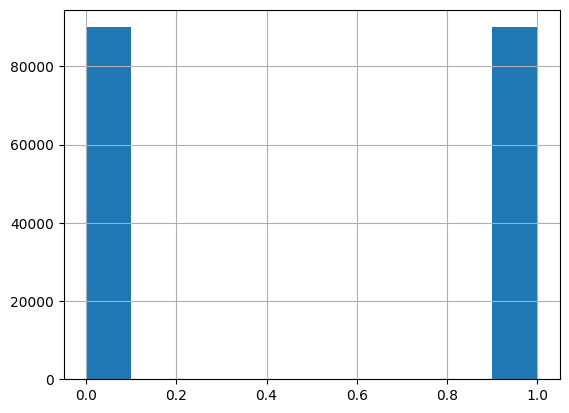

In [ ]:
train_df['Resigned'].hist()

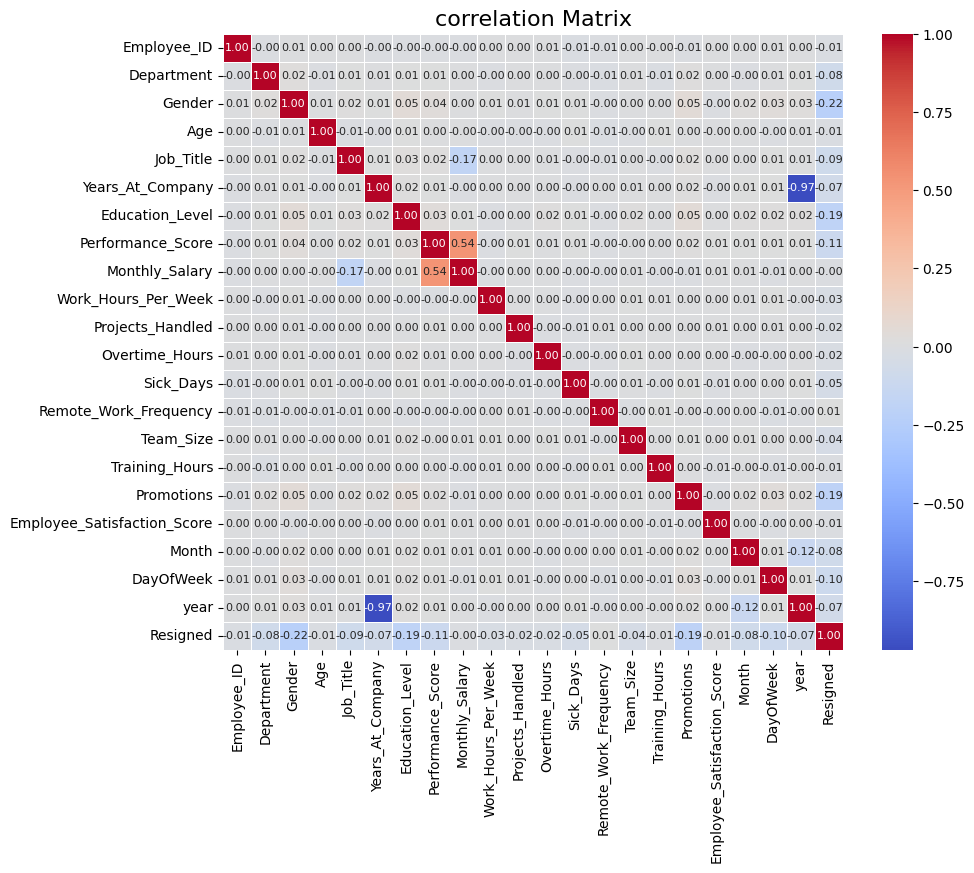

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import figure

plt.figure(figsize=(10,8))
corr_matrix=train_df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size":8}
            )
plt.title('correlation Matrix',fontsize=16)
plt.show()

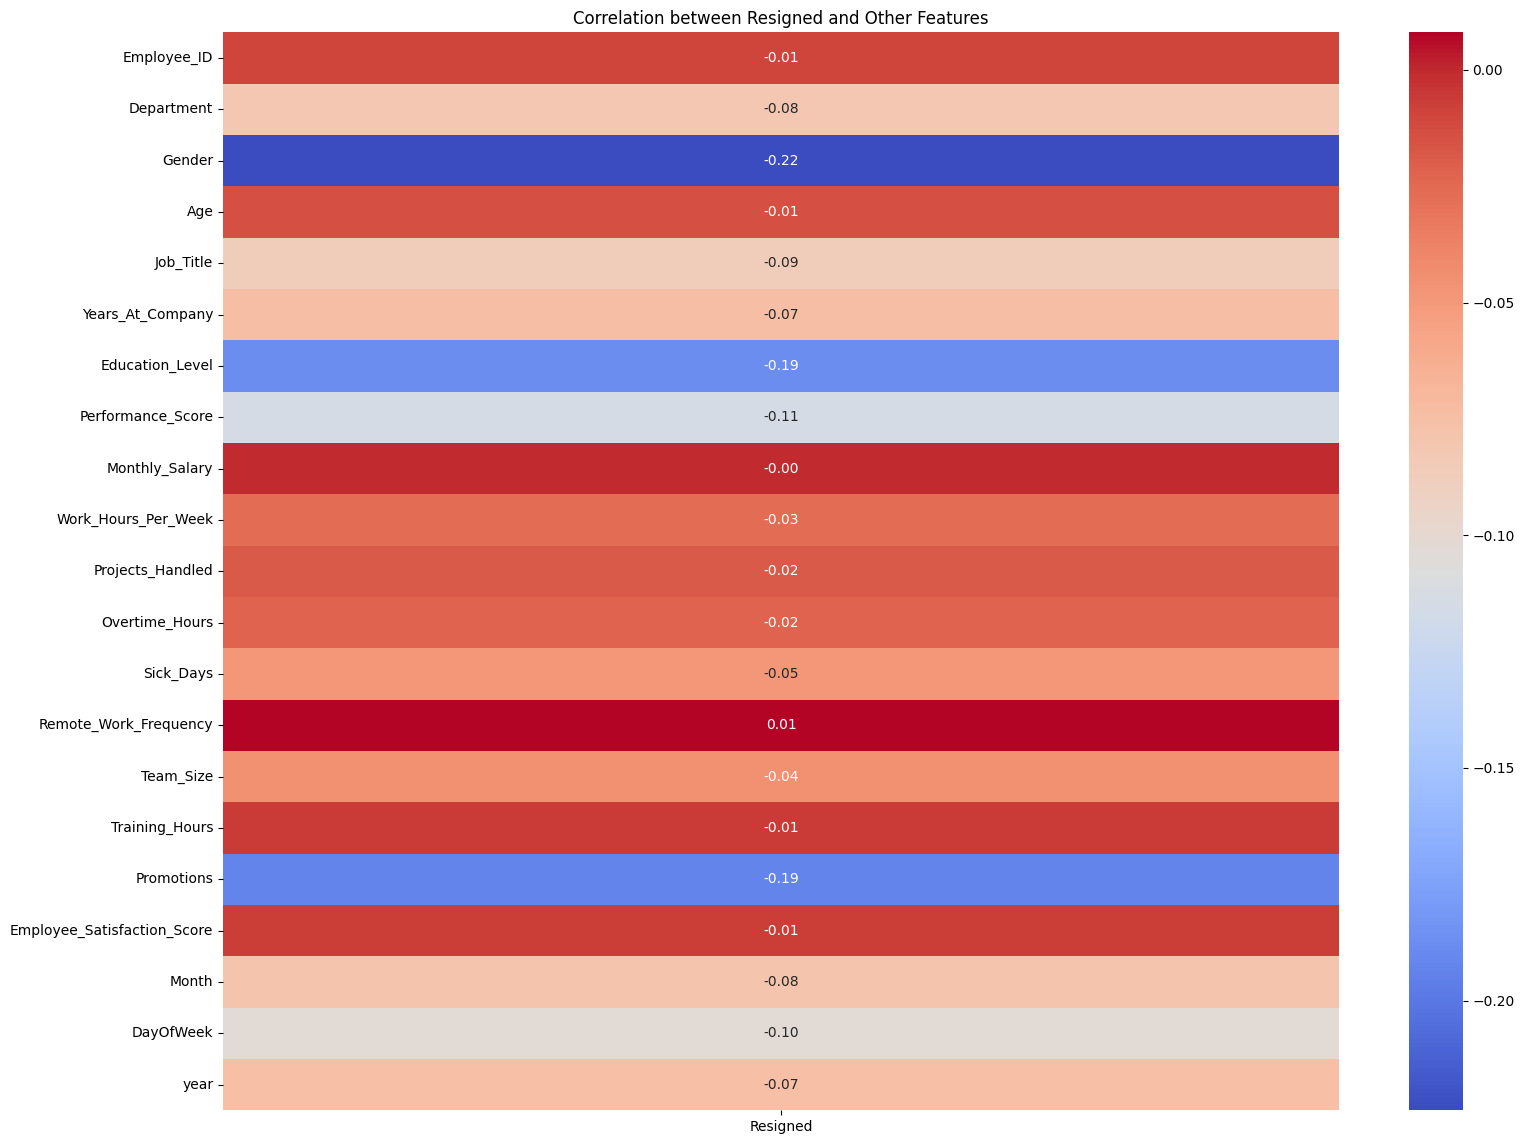

In [ ]:
plt.figure(figsize=(18, 14))
employee_corr = train_df.corr()['Resigned']

employee_corr =employee_corr.drop('Resigned')
sns.heatmap(employee_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True,annot_kws={'size': 10})
plt.title('Correlation between Resigned and Other Features')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  int64  
 2   Gender                       100000 non-null  int64  
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  int64  
 5   Years_At_Company             100000 non-null  int64  
 6   Education_Level              100000 non-null  int64  
 7   Performance_Score            100000 non-null  int64  
 8   Monthly_Salary               100000 non-null  float64
 9   Work_Hours_Per_Week          100000 non-null  int64  
 10  Projects_Handled             100000 non-null  int64  
 11  Overtime_Hours               100000 non-null  int64  
 12  Sick_Days                    100000 non-null  int64  
 13  

In [ ]:
train_df.drop(['Employee_ID','Department','Age','Job_Title','Years_At_Company','Monthly_Salary','Work_Hours_Per_Week','Projects_Handled','Overtime_Hours','Sick_Days','Remote_Work_Frequency','Team_Size','Training_Hours','Employee_Satisfaction_Score','Month','year'],axis=1,inplace=True)

**Logisticregression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x =train_df.drop(['Resigned'], axis=1)
y=train_df['Resigned']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.65


**Decisiontreeclassifier**

In [ ]:
x =train_df.drop(['Resigned'], axis=1)
y=train_df['Resigned']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)



from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.68


**random forest**

In [ ]:
x = train_df.drop(['Resigned'],axis=1)
y = train_df['Resigned']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6840537837537504

**SVC**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(max_iter=5000))
])

pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.6513612623624847

**kfold**

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
x=train_df.drop('Resigned',axis=1)
y=train_df['Resigned']

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LogisticRegression()

best_accuracy=0
best_fold=-1

best_x_train=None
best_y_train=None
best_x_test=None
best_y_test=None
best_y_pred=None

for fold,(train_index,test_index) in enumerate(kf.split(x),1):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(f"fold{fold} Accuracy:{acc}")

  if acc >best_accuracy:
    best_accuracy=acc
    best_fold=fold
    best_x_train=x_train
    best_y_train=y_train
    best_x_test=x_test
    best_y_test=y_test
    best_y_pred=y_pred
print(f"\n best fold:{best_fold} with accuracy:{best_accuracy}")

fold1 Accuracy:0.651211245693966
fold2 Accuracy:0.6570452272474719
fold3 Accuracy:0.6537115235026114
fold4 Accuracy:0.6547116346260695
fold5 Accuracy:0.6542393599288809

 best fold:2 with accuracy:0.6570452272474719


In [ ]:
model = LogisticRegression()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.6570452272474719

In [ ]:
model = DecisionTreeClassifier()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.6848260917879765

In [ ]:
model = RandomForestClassifier()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.6846594066007334

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(max_iter=5000))
])

pipe.fit(best_x_train,best_y_train)
pipe.score(best_x_test, best_y_test)

0.6558506500722302

In [ ]:
train_df

,Gender,Education_Level,Performance_Score,Promotions,DayOfWeek,Resigned
0,1,1,5,0,2,0
1,1,1,5,2,3,0
2,1,1,3,0,0,0
3,0,2,2,1,5,0
4,0,2,2,1,4,0
...,...,...,...,...,...,...
179975,0,2,3,0,0,1
179976,0,2,5,0,1,1
179977,0,2,3,0,1,1
179978,0,2,2,1,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=8,
    criterion="entropy",
    ccp_alpha=0.0000008
)
tree_model.fit(best_x_train,best_y_train)
tree_model.score(best_x_test,best_y_test)

0.6853817090787865

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=(5,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(best_x_train,best_y_train,epochs=40,batch_size=32)

Epoch 1/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6491 - loss: 0.6260
Epoch 2/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6776 - loss: 0.6016
Epoch 3/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6808 - loss: 0.5994
Epoch 4/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6822 - loss: 0.5973
Epoch 5/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6813 - loss: 0.5985
Epoch 6/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6811 - loss: 0.5987
Epoch 7/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6804 - loss: 0.5993
Epoch 8/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6822 - loss: 0.5982
Epoch 9/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6836 - loss: 0.5959
Epoch 10/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6813 - loss: 0.5975
Epoch 11/40
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6824 - loss: 0.5977
Epoch 12/40
4500/4500

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(best_x_test)
accuracy = accuracy_score(best_y_test, y_pred)
print(f"Model Accuracy:{accuracy * 100:.2f}%")

Model Accuracy:68.54%


In [ ]:
probs=model.predict(np.array([[0,2,3,0,0]]))
pred_classes=np.round(probs).astype(int)

print('probabilities:\n',probs.flatten())
print()
print('predicted classes(by rounding):',pred_classes.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
probabilities:
 [0.61475426]

predicted classes(by rounding): [1]


In [ ]:
import pickle

with open('employee.tree_model.pkl','wb') as file:
  pickle.dump(model,file)


In [ ]:
with open('/content/employee.model.pkl','rb') as file:
  load_model=pickle.load(file)

# conclusion
 In this project, machine learning techniques were successfully applied to analyze employee performance and productivity patterns using historical workforce data. Through data preprocessing, feature selection, and model training, the Decision Tree model was able to identify key factors influencing employee outcomes such as performance level, productivity, or role effectiveness.

Hyperparameter tuning helped improve model accuracy and reduced overfitting, resulting in better generalization on unseen data. Important features such as experience level, department, workload metrics, and skill indicators showed strong relationships with the target prediction.

Overall, this project demonstrates how data science can support HR decision-making by enabling early identification of performance trends, optimizing workforce planning, and improving organizational productivity. Future improvements could include testing advanced ensemble models (Random Forest, XGBoost), adding more real-time employee behavior data, and deploying the model for real-world HR analytics applications.